<a href="https://colab.research.google.com/github/Matheuss1/artificial-intelligence-and-what-is-behind/blob/assignment-03/logistic_regression_and_neural_networks_assignment_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment \#3**: Machine Learning MC886/MO444
University of Campinas (UNICAMP), Institute of Computing (IC)

Prof. Marcelo Reis, 2022s1



In [ ]:
# TODO: RA & Name 
print('241882: ' + 'Matheus Silva de Deus')
print('186447: ' + 'Renan Borges Alves')

241882: Matheus Silva de Deus
186447: Renan Borges Alves


## Objective 

Explore **classification techniques** (logistic regression & neural networks) and come up with the best possible model to the problem, avoiding overfitting. In particular, build an object recognition system to accurately classify images using the [PathMNIST dataset](https://journals.plos.org/plosmedicine/article?id=10.1371/journal.pmed.1002730).

## Dataset

PathMNIST is a dataset of [MedMNIST's article](https://medmnist.com/v1) images, consisting of a training set of 89,996 examples, validation set of 10,004 examples and a test set of 7,180 examples. Each colon pathology example is a 28x28 RGB image, associated with a label from 9 classes.

Each example is assigned to one of the following labels:

**Label 	Description**
- ADI 	adipose tissue
- BACK 	background
- DEB 	debris
- LYM 	lymphocytes
- MUC 	mucus
- MUS 	smooth muscle
- NORM 	normal colon mucosa
- STR 	cancer-associated stroma
- TUM 	colorectal adenocarcinoma epithelium.






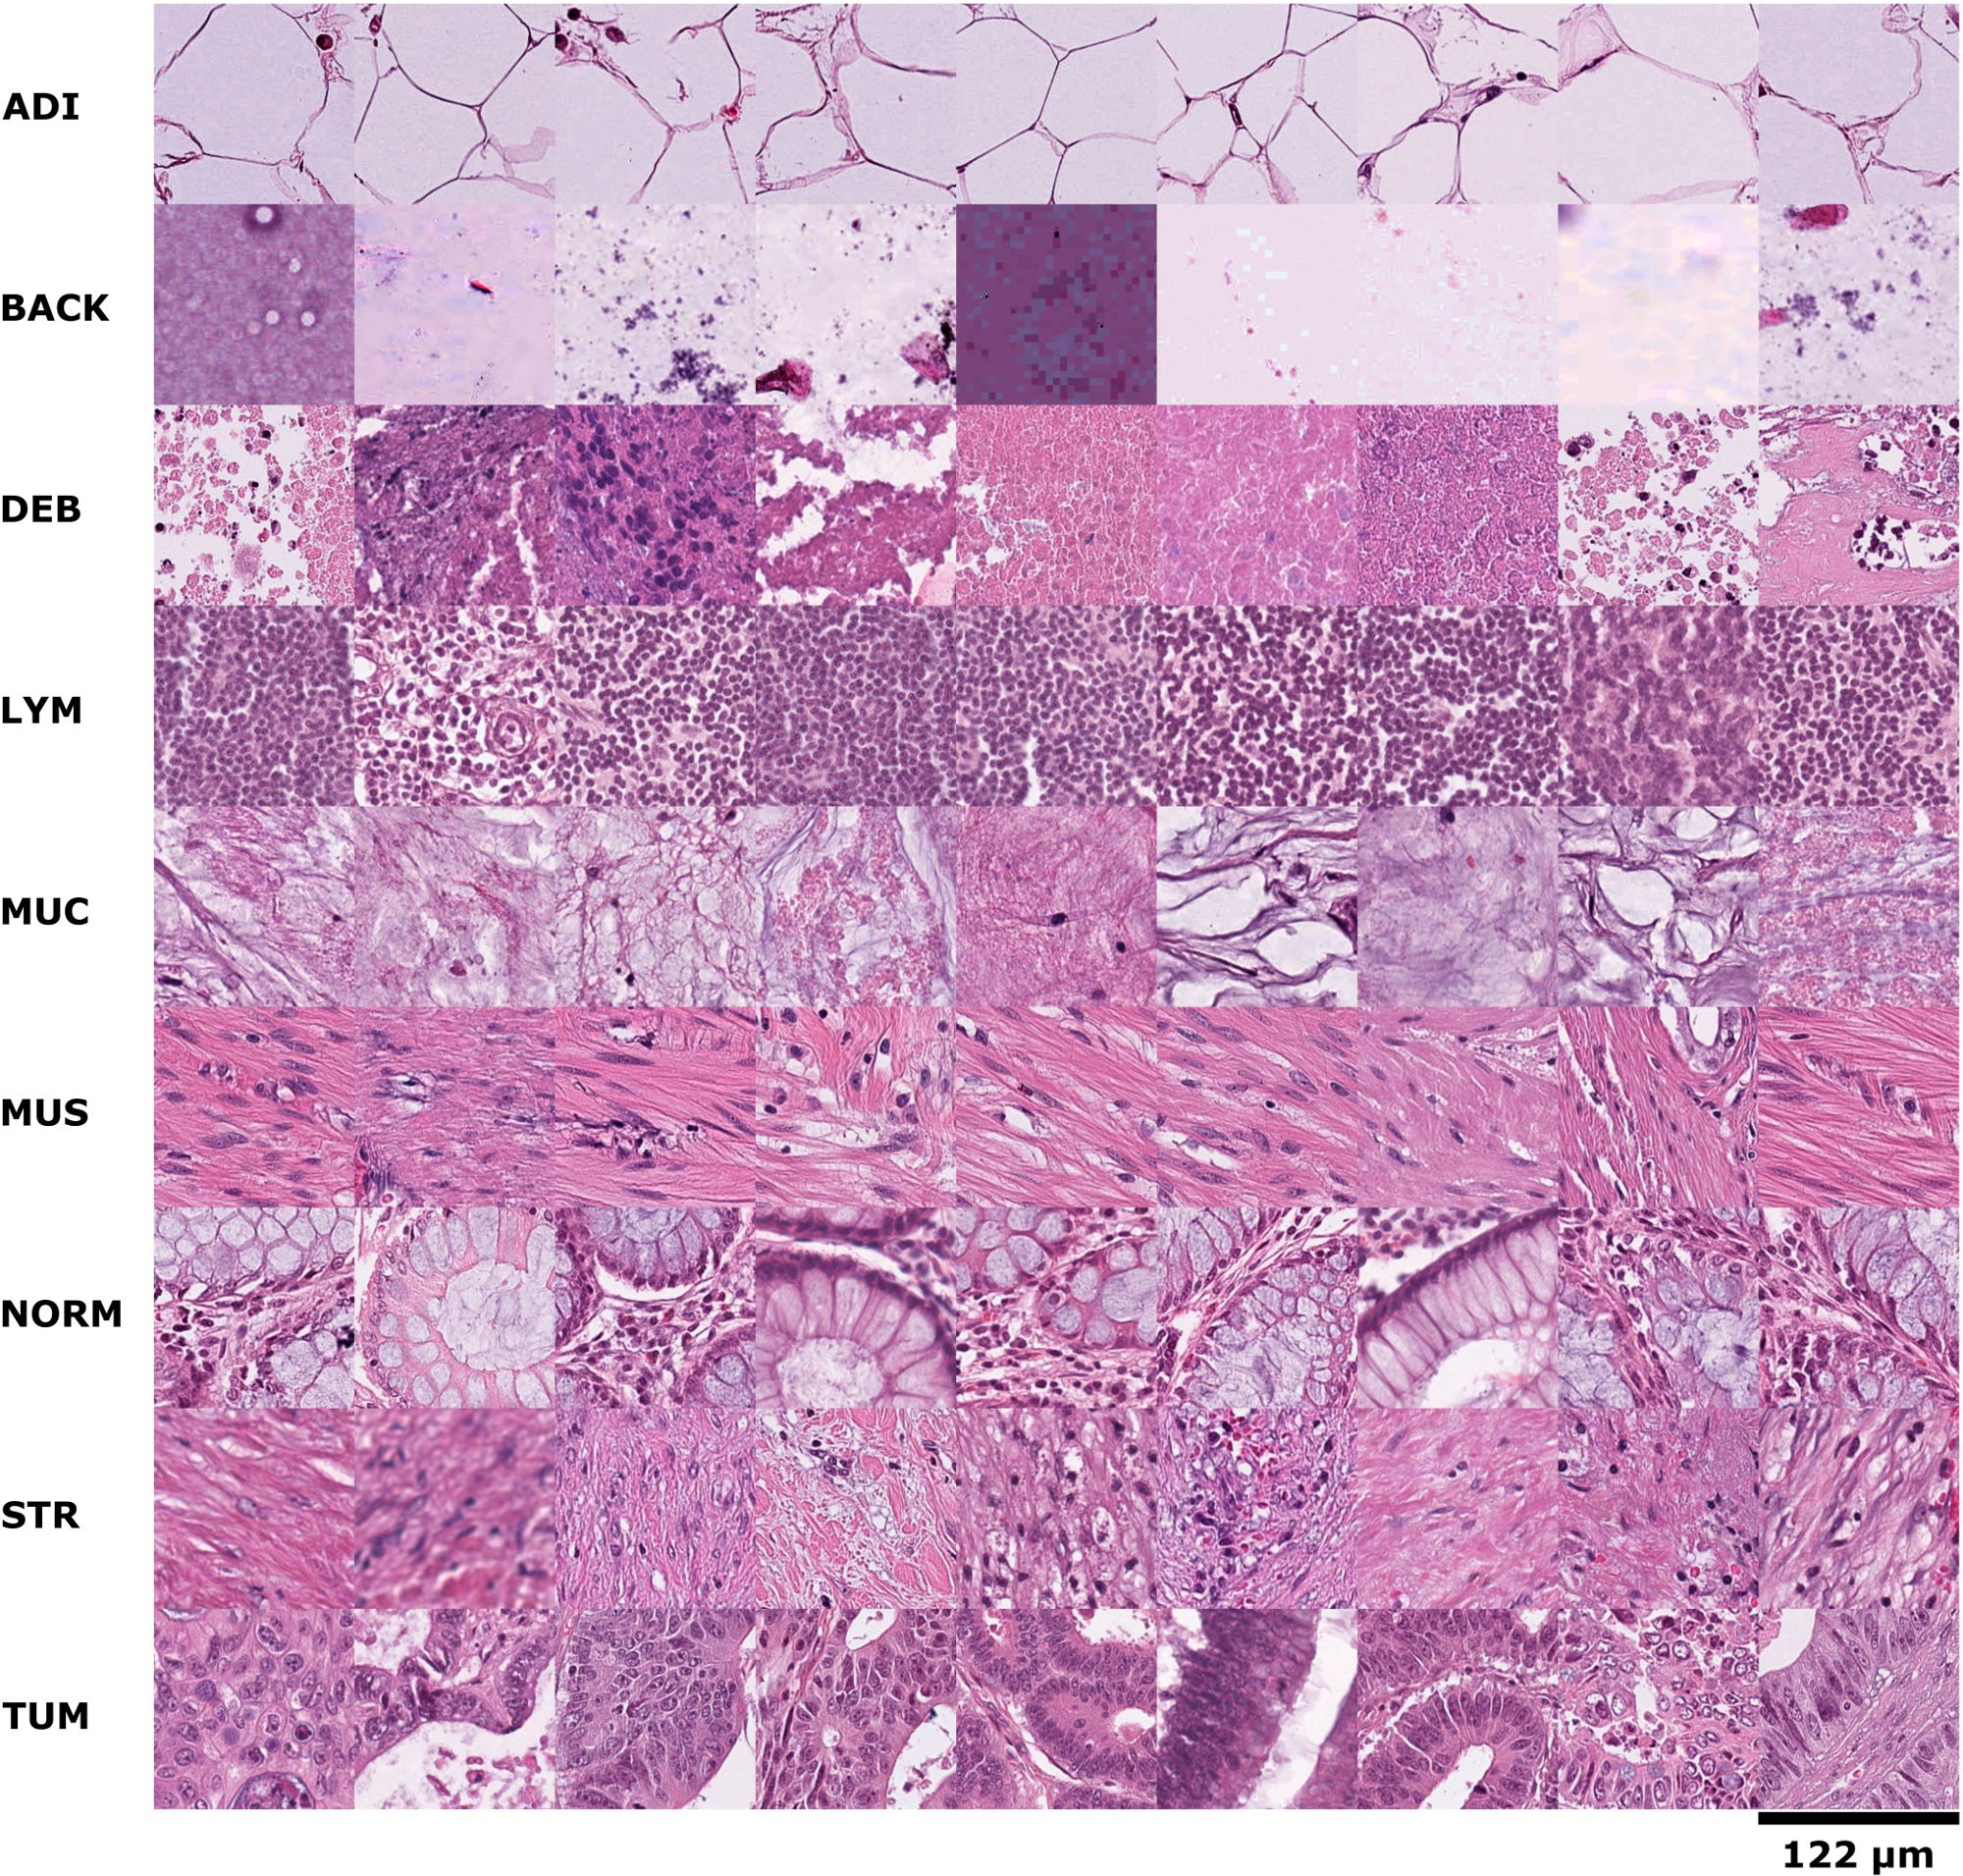

**Dataset Information:**

- You should respect the following traininig/validation/test split. Avoid overfitting.
- The data is available at: https://zenodo.org/record/5208230/files/pathmnist.npz.	
- You should evaluate the models using the balanced accuracy.

## Deadline

Wednesday, June 9th 11:59pm. 

Penalty policy for late submission: You are not encouraged to submit your assignment after due date. However, in case you did, your grade will be penalized as follows:
- June 10th 11:59pm : grade * 0.25


## Submission

On Google Classroom, submit your Jupyter Notebook (in Portuguese or English).

**This activity is NOT individual, it must be done in pairs (two-person group).**

In [ ]:
# Download dataset
! wget https://zenodo.org/record/5208230/files/pathmnist.npz

--2022-06-06 13:51:46--  https://zenodo.org/record/5208230/files/pathmnist.npz
Resolving zenodo.org (zenodo.org)... 137.138.76.77
Connecting to zenodo.org (zenodo.org)|137.138.76.77|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205615438 (196M) [application/octet-stream]
Saving to: ‘pathmnist.npz.1’

pathmnist.npz.1     100%[===================>] 196.09M  10.5MB/s    in 13s     

2022-06-06 13:52:01 (14.9 MB/s) - ‘pathmnist.npz.1’ saved [205615438/205615438]



In [ ]:
import numpy as np
import pickle

In [ ]:
# preparing data to use with sklearn
pathmnist = np.load('pathmnist.npz')
x_train, y_train = pathmnist['train_images'], pathmnist['train_labels']
x_val, y_val = pathmnist['val_images'], pathmnist['val_labels']
x_test, y_test = pathmnist['test_images'], pathmnist['test_labels']

x_train = x_train.reshape(x_train.shape[0], -1)
x_val = x_val.reshape(x_val.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

y_train = y_train.squeeze()
y_val = y_val.squeeze()
y_test = y_test.squeeze()

In [ ]:
# prepare data to use with pytorch
from torch.utils.data import Dataset, DataLoader

class PathMNIST(Dataset):
    def __init__(self, mode="train", transform=None):
      pathmnist = np.load('pathmnist.npz')

      if mode == "train":
        x, y = pathmnist['train_images'], pathmnist['train_labels']
      elif mode == "val":
        x, y = pathmnist['val_images'], pathmnist['val_labels']
      elif mode == "test":
        x, y = pathmnist['test_images'], pathmnist['test_labels']
      else:
        raise ValueError("Invalid mode.")

      self._x = x
      self._y = y.squeeze()
      self._transform = transform

    def __len__(self):
      return self._x.shape[0]

    def __getitem__(self, idx):
      item = self._x[idx]
      label = self._y[idx]
      if self._transform is not None:
        item = self._transform(item)
      item = item.flatten()
      return item, label

In [ ]:
train_set = PathMNIST(mode="train")
val_set = PathMNIST(mode="val")
test_set = PathMNIST(mode="test")

train_loader = DataLoader(train_set, batch_size=32, shuffle=True)
val_loader = DataLoader(val_set, batch_size=1)
test_loader = DataLoader(val_set, batch_size=1)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.colors
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder

In [ ]:
def get_label_name(value):
  names = ["ADI", "BACK", "DEB", "LYM", "MUC", "MUS", "NORM", "STR", "TUM"]

  return names[value]

def show_head_images(images, rows_number, cols_number, labels=None, scale=2):
  figsize = (cols_number * scale, rows_number * scale)

  fig, axes = plt.subplots(nrows= rows_number, ncols=cols_number, figsize=figsize)

  axes = axes.flatten()

  for i, (ax, img) in enumerate(zip(axes, images)):
    ax.imshow(img.reshape(28, 28, 3))
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)

    if labels is not None:
      ax.set_title(get_label_name(labels[i]))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

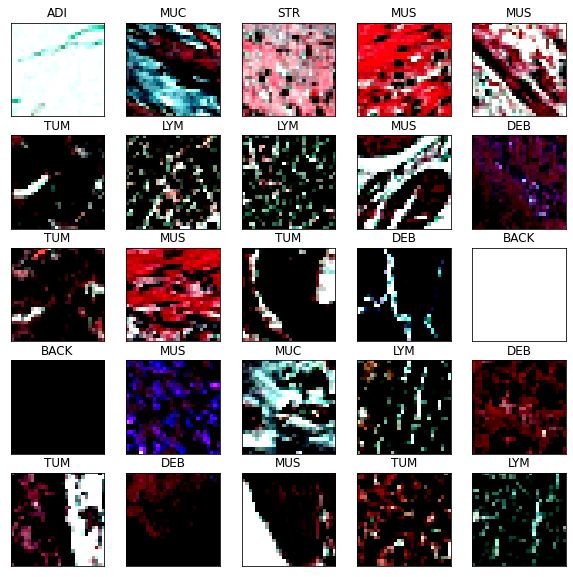

In [ ]:
# Visualization of some of the train dataset images
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(x_train)

x_train = scaler.transform(x_train)

x_val = scaler.transform(x_val)

show_head_images(x_train, 5, 5, labels=y_train)

In [ ]:
# Check how balanced the dataset is for each class

unique, counts = np.unique(y_train, return_counts=True)

dict(zip(unique, counts))

{0: 9366,
 1: 9509,
 2: 10360,
 3: 10401,
 4: 8006,
 5: 12182,
 6: 7886,
 7: 9401,
 8: 12885}

## Activities


### 1. Logistic Regression
(2 points) Perform Multinomial Logistic Regression (_i.e._, softmax regression). It is a generalization of Logistic Regression to the case where we want to handle multiple classes. 

In [ ]:
# TODO: Multinomial Logistic Regression. You can use scikit-learn libraries.
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import balanced_accuracy_score

class MultiLR():
    #Define parameters
    def __init__(self, max_iter=100):
        #replace for Logistic Regression
        self.clf = LogisticRegression(
            multi_class="multinomial",
            max_iter=max_iter,
            solver="saga",
            )
    
    def fit(self, X, y):
        self.clf.fit(X, y)

        return self.clf
    
    def predict(self, X):
        return self.clf.predict(X)

    def save_model(self, filename):
        """
        Save the model to disk
        """
        pickle.dump(self.clf, open(filename, 'wb'))
    
    def load_model(self, filename):
        self.clf = pickle.load(open(filename, 'rb'))

    def score(self, X, y_true):
        y_pred = self.predict(X)
        return balanced_accuracy_score(y_true, y_pred)

In [ ]:
filename = 'finalized_model.sav'

lr_cls = MultiLR(max_iter=100)
lr_cls.fit(x_train, y_train)

y_predict =lr_cls.predict(x_val)
# # Its important to save the model after training
# lr_cls.save_model(filename)
# lr_cls.score(X, y)



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


In [ ]:
from sklearn.metrics import balanced_accuracy_score

balanced_accuracy_score(y_val, y_predict)

0.5014573371864914


> What are the conclusions? (1-2 paragraphs)





### 2. Neural Networks
(2 points) Move on to Neural Networks, using _one_ or _two hidden layers_. You should choose weight & bias initialization, activation function, number of hidden neurons, loss function, ... keep it simple.


After the simple NN explore more two differents architectures. You can change weight & bias initialization, activation function, number of hidden neurons, number of layers, loss function, ... It's an empirical experiment.  

#### Pytorch

In [ ]:
# TODO: Neural Network. You can use scikit-learn, Keras/TensorFlow, or PyTorch libraries.
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchsummary import summary

#Use this if you prefer pytorch
class PathMNISTNN(nn.Model)
    # Declare the layers here
    def __init__(self):
        super(PathMNISTNN, self).__init__()
    # Flow of the model
    def forward(self, x):
        pass


pt_model = PathMNISTNN()
summary(pt_model)

In [ ]:
import torch
from torch import nn
from torch.nn import functional as F
from torch.utils.data import DataLoader
from torch.utils.data import random_split
from torchvision.datasets import MNIST
from torchvision import transforms
import pytorch_lightning as pl
from pytorch_lightning.callbacks import (
    ModelCheckpoint,
    EarlyStopping,
    )
from pytorch_lightning.loggers import TensorBoardLogger


class PLPathMNISTNN(pl.LightningModule):
	def __init__(self, model, learning_rate):
		super().__init__()
		self.model = model
        self.lr = learning_rate

	def forward(self, x):
		output = self.model(x)
		return output

	def configure_optimizers(self):
		optimizer = torch.optim.Adam(self.parameters(), lr=self.lr)
		return optimizer

	def training_step(self, train_batch, batch_idx):
		x, y = train_batch
		y_hat = self(x)
		loss = F.cross_entropy(y_hat, y)
		self.log('train_loss', loss)
		return loss

	def validation_step(self, val_batch, batch_idx):
		x, y = val_batch
		y_hat = self(x)
		loss = F.cross_entropy(y_hat, y)
		self.log('val_loss', loss)
        return loss
	
	def test_step(self, test_batch, batch_idx):
		x, y = test_batch
		y_hat = self.(x)
		loss = F.cross_entropy(y_hat, y)
		self.log('val_loss', loss)
        return loss

	def validation_epoch_end(self, outputs):
		"""
		implement your metrics here
		"""
		pass
	
	def test_epoch_end(self, outputs):
		"""
		implement your metrics here
		"""
		pass
	
# model
model = PLPathMNISTNN(pt_model)

# Define callbacks and logger
early_stopping = EarlyStopping('val_loss')
checkpoint_callback = ModelCheckpoint(
    monitor='val_loss',
    dirpath='my/path/',
    filename='sample-pathmnist-{epoch:02d}-{val_loss:.2f}',
    auto_insert_metric_name=False,
)
logger = TensorBoardLogger("yourdrive/tb_logs", name="PLPathMNISTNN")

# training
trainer = pl.Trainer(
    gpus=1,
    precision=16,
    max_epochs=100,
    callbacks=[early_stopping, checkpoint_callback],
    logger=logger,
    )

In [ ]:
trainer.fit(model, train_loader, val_loader)

In [ ]:
%reload_ext tensorboard
%tensorboard --logdir=/yourdrive/tb_logs

#### Tensorflow

In [ ]:
import tensorflow as tf

#Use this if you prefer Keras/Tensorflow
class TFPathMNISTNN(tf.keras.Model):
    # Declare the layers here
    def __init__(self):
        super().__init__()
    # Flow of the model
    def call(self, inputs):
        pass

model = TFPathMNISTNN()
model.summary()

In [ ]:
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=2),
    tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5'),
    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
]
model.fit(dataset, epochs=10, callbacks=my_callbacks)

In [ ]:
%reload_ext tensorboard
%tensorboard --logdir=/yourdrive/tb_logs

> What are the conclusions? Regarding the Multinomial Logistic Regression model, does the performance improve? (2-4 paragraphs)

### 3. Image Processing
(1 point) Apply image preprocessing techniques to improve the performance of the last neural network (for example, convert RGB image (3 channel) to grayscale (1 channel), standardization, normalization).

See: https://scikit-image.org/ and https://opencv.org/

Explore some geometric, morphological and textures transformations.



In [ ]:
# TODO: Image processing and Neural Network. You can use scikit-learn, Keras/TensorFlow, or PyTorch libraries.

> What are the conclusions? Regarding the first architecture, does the performance improve? (2-4 paragraphs)

### 4. Convolutional Neural Networks
(2 points) Build and train a convolutional neural network for data classification using the dataloader presented below. You CAN use the Keras library to build the model. Beware of overfitting!
Apply a weight regularization to avoid overfitting and improve the performance of the neural network (for example, l1, l2, l1 and l2).

In [ ]:
#Use this code -- You do not need to change it!

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.utils import shuffle

# creating custom data loader to use with CNN in Keras
class PathMNISTCNN(tf.keras.utils.Sequence):
  def __init__(self, mode="train", batch_size=32, n_classes=9, shuffle=True, seed=42):
    pathmnist = np.load('pathmnist.npz')

    if mode == "train":
      x, y = pathmnist['train_images'], pathmnist['train_labels']
    elif mode == "val":
      x, y = pathmnist['val_images'], pathmnist['val_labels']
    elif mode == "test":
      x, y = pathmnist['test_images'], pathmnist['test_labels']
    else:
      raise ValueError("Invalid mode. Accepted modes: train, val, test")
    self._x = x
    self._y = y.squeeze()
    self.batch_size = batch_size
    self.n_classes = n_classes
    self.shuffle = shuffle
    self.random_seed = seed


  def on_epoch_end(self):
    pass


  def __len__(self):
    return self._x.shape[0]//self.batch_size
  

  def __getitem__(self, idx):
    if(self.shuffle):
      self._x, self._y = shuffle(self._x, self._y, random_state=self.random_seed)

    images, labels = [], []
    for i in range(idx*self.batch_size, (idx+1)*self.batch_size):
      images.append(self._x[i])
      y = [0 if c != self._y[i] else 1 for c in range(self.n_classes)]
      labels.append(y)
    return np.array(images), np.array(labels)

In [ ]:
train_data_cnn = PathMNISTCNN(mode="train")
val_data_cnn = PathMNISTCNN(mode="val", shuffle=False)
test_data_cnn = PathMNISTCNN(mode="test", shuffle=False)

In [ ]:
import matplotlib.pyplot as plt
#data visualization
plt.figure(figsize=(10, 10))
for i, (images, labels) in enumerate(train_data_cnn):
  if(i==9):
    break
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(images[i])
  plt.title(np.argmax(labels[i]))
  plt.axis("off")

In [ ]:
# TODO: Convolutional Neural Network. Use Keras/TensorFlow or PyTorch libraries.
def cnn_model_1(input_shape, n_classes, activation_function):
    input = keras.Input(shape=input_shape+(3,))
    x = layers.Rescaling(1.0/255)(input)
    x = None #Build your CNN here
    output = layers.Dense(n_classes, activation=activation_function)(x)
    return keras.Model(input, output)

In [ ]:
activation_function = ""  #replace by a valid activation function string for the 
                          #last layer -- check the options:
                          # https://keras.io/api/layers/activations/ 

model1 = cnn_model_1(input_shape=(28,28), n_classes=9,
                     activation_function=activation_function)
model1.summary()

In [ ]:
epochs = -1 #replace by a valid number of epochs
#feel free to add more callbacks
callbacks = [keras.callbacks.ModelCheckpoint('model1.h5', 
                                              monitor='val_loss', 
                                              save_best_only=True),]
optimizer = None #replace by a valid optimizer -- check the options https://keras.io/api/optimizers/
loss = "" #replace by a valid loss string -- check the options https://keras.io/api/losses/  
model1.compile(optimizer=optimizer, loss=loss,
               metrics=["accuracy"],) #feel free to add more metrics

history1 = model1.fit(train_data_cnn, epochs=epochs, callbacks=callbacks, 
                      validation_data=val_data_cnn,)

In [ ]:
def plot_history(history):
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()

  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()

In [ ]:
plot_history(history1)

> What are the conclusions? Regarding the first architecture, does the performance improve? (2-4 paragraphs)

### 5. Upgrade your CNN
(1 point) Apply two update rules used to optimize Neural Networks (for example, Momentum, Adagrad, Adam, RMSProp, Adadelta). For reference, see http://ruder.io/optimizing-gradient-descent.

In [ ]:
# TODO: Convolutional Neural Network. Use Keras/TensorFlow or PyTorch libraries.
def cnn_model_2(input_shape, n_classes, activation_function):
    input = keras.Input(shape=input_shape+(3,))
    x = layers.Rescaling(1.0/255)(input)
    x = None #Build your CNN here
    output = layers.Dense(n_classes, activation=activation_function)(x)
    return keras.Model(input, output)

In [ ]:
activation_function = ""  #replace by a valid activation function string for the 
                          #last layer -- check the options:
                          # https://keras.io/api/layers/activations/ 

model2 = cnn_model_2(input_shape=(28,28), n_classes=9,
                     activation_function=activation_function)
model2.summary()

In [ ]:
epochs = -1 #replace by a valid number of epochs
#feel free to add more callbacks
callbacks = [keras.callbacks.ModelCheckpoint('model2.h5', 
                                              monitor='val_loss', 
                                              save_best_only=True),]
optimizer = None #replace by a valid optimizer -- check the options https://keras.io/api/optimizers/
loss = "" #replace by a valid loss string -- check the options https://keras.io/api/losses/  
model2.compile(optimizer=optimizer, loss=loss,
               metrics=["accuracy"],) #feel free to add more metrics

history2 = model2.fit(train_data_cnn, epochs=epochs, callbacks=callbacks, 
                      validation_data=val_data_cnn,)

In [ ]:
plot_history(history2)

In [ ]:
# TODO: Convolutional Neural Network. Use Keras/TensorFlow or PyTorch libraries.
def cnn_model_3(input_shape, n_classes, activation_function):
    input = keras.Input(shape=input_shape+(3,))
    x = layers.Rescaling(1.0/255)(input)
    x = None #Build your CNN here
    output = layers.Dense(n_classes, activation=activation_function)(x)
    return keras.Model(input, output)

In [ ]:
activation_function = ""  #replace by a valid activation function string for the 
                          #last layer -- check the options:
                          # https://keras.io/api/layers/activations/ 

model3 = cnn_model_3(input_shape=(28,28), n_classes=9,
                     activation_function=activation_function)
model3.summary()

In [ ]:
epochs = -1 #replace by a valid number of epochs
#feel free to add more callbacks
callbacks = [keras.callbacks.ModelCheckpoint('model3.h5', 
                                              monitor='val_loss', 
                                              save_best_only=True),]
optimizer = None #replace by a valid optimizer -- check the options https://keras.io/api/optimizers/
loss = "" #replace by a valid loss string -- check the options https://keras.io/api/losses/  
model3.compile(optimizer=optimizer, loss=loss,
               metrics=["accuracy"],) #feel free to add more metrics

history3 = model3.fit(train_data_cnn, epochs=epochs, callbacks=callbacks, 
                      validation_data=val_data_cnn,)

In [ ]:
plot_history(history3)

 > What are the conclusions? Does the performance improve? (1-2 paragraphs)

 


### 6. Transfer Learning
(1 point) Apply the transfer-learning technique using any of the pre-trained models available in Keras as a base (see: https://www.tensorflow.org/api_docs/python/tf/keras/applications).

In [ ]:
def cnn_transfer_learning_model(base_model, input_shape, n_classes, activation_function):
    input = keras.Input(shape=input_shape+(3,))
    x = layers.Resizing(32, 32, interpolation="bilinear")(input)
    x = layers.Rescaling(1.0/255)(x)
    x = base_model(x)
    x = None #Build your classifier here
    output = layers.Dense(n_classes, activation=activation_function)(x)
    return keras.Model(input, output)

In [ ]:
base_model = None #Adicione um modelo pré-treinado válido conforme
                  # https://www.tensorflow.org/api_docs/python/tf/keras/applications
                  # Use o input_shape de 32x32x3 pois é o menor possível
base_model.trainable = False
model4 = cnn_transfer_learning_model(base_model, input_shape=(32,32), n_classes=9,
                                    activation_function=activation_function)
model4.summary()

In [ ]:
epochs = -1 #replace by a valid number of epochs
#feel free to add more callbacks
callbacks = [keras.callbacks.ModelCheckpoint('model4.h5', 
                                              monitor='val_loss', 
                                              save_best_only=True),]
optimizer = None #replace by a valid optimizer -- check the options https://keras.io/api/optimizers/
loss = "" #replace by a valid loss string -- check the options https://keras.io/api/losses/  
model4.compile(optimizer=optimizer, loss=loss,
               metrics=["accuracy"],) #feel free to add more metrics

history4 = model4.fit(train_data_cnn, epochs=epochs, callbacks=callbacks, 
                      validation_data=val_data_cnn,)

> What are the conclusions? Does the performance improve? (1-2 paragraphs)

### 7. Conclusions
(1 point) Pick **your best model** and plot the confusion matrix in the **test set**. 


In [ ]:
# TODO: Plot the confusion matrix. You can use scikit-learn, seaborn, matplotlib libraries.

> What are the conclusions? (1-2 paragraphs)
